# Intro to Loading Images with OpenCV and Matplotlib in a Python Notebook (+ Bonus using PIL / Pillow)

# 1. Import and inline setup
At the start of our notebook we put `%matplotlib inline`, this isn't necessary in normal python because there is no inline viewing.

We import `matplotlib.pyplot` as `plt` for ease of typing.

We also import opencv (`cv2`) to load images. Matplotlib uses Numpy arrays (ndarray) to display, so does opencv.
Later we'll using PIL / Pillow to load images, which will require converting to numpy anyway

Use `ctrl` + `enter` to run cells more easily, or use the `play` button above or to the left of cells.

Once we've run both of the following cells we'll be able to view images. If this fails then your virtual environment probably doesn't have both matplotlib and cv2 installed, so you'll need to `pip install...` or `conda install...` based on your setup.

Also note that PIL has inline image viewing, I'm not sure if it's supported in all notebooks. There's also HTML5 viewing.

[Refernce from SO](https://stackoverflow.com/a/24884342)

[OpenCV docs for version 3.4.2](https://docs.opencv.org/3.4.2/) (Relatively similar between versions 2.x and 4.x, the different pip and conda and conda-forge sources will give different verisions)

In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"OpenCV version: {cv2.__version__}")

Matplotlib version: 3.2.1
OpenCV version: 4.2.0


# 2. Fetching some image files

In this step we do a basic folder / directory search with `glob.glob`, which is a lot like `ls` in the terminal. I'll use a String to specify the directory and an asteriks `*.png` to indicate a wildcard (i.e. it selects any filename that ends in '.png' in the directory. (We have to import it to use it, but it's built into python)

Where your files are may vary, in this case I use a relative path ('./start_images') since the `file.ipynb` is in the same folder as my data folder. You could also use an absolute path ('/Users/username/datasets/mycooldata')

[Reference for glob](https://pymotw.com/2/glob/)
[Reference for directories](https://en.wikipedia.org/wiki/Path_(computing)#Absolute_and_relative_paths)

In [3]:
import glob

In [11]:
directory_wildcard_png = "./start_images/*.png"
file_names = glob.glob(directory_wildcard_png)
print(f"Found {len(file_names)} .png files in the folder {directory_wildcard_png}")
print("First 3 file_paths:")

first_3 = file_names[:3]
for file_path in first_3:
    print(file_path)

Found 6 .png files in the folder ./start_images/*.png
First 3 file_paths:
./start_images/6_poke.png
./start_images/4_poke.png
./start_images/2_poke.png


# 3. Use OpenCV to Load image files into numpy ndarrays

Now that we have the file paths that tell where each image is, we can load them.

We'll make an empty list that we'll append with loaded images. We 'Image Read' (`imread`) in the images and specify OpenCV to give us a 3-channel image (Red, Green, Blue), which is what we generally want to work with (This is included because if you want to use a texture / sprite with empty alpha you should use `cv2.IMREAD_UNCHANGED` to load in a 4-channel image with alpha transparency). 

OpenCV (and by extension Numpy in most cases) follows the order of (ROWS, COLUMNS, CHANNELS) for the array shape. So when we use the `.shape` attribute on an OpenCV image we get a 3-tuple of (Height, Width, Channels). If it is 1-channel it will be a 2-tuple of (Height, Width) **If working in PIL see 9.**

You can do this with as many files as you want, but if you try to load too many your computer may slow down / python will Out Of Memory error.

If you have an image in the same folder a non-absolute path will probably work: "myimage.png", "./myimage.png" 

[Reference for OpenCV non-notebook](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html)

In [12]:
open_cv_images = []
for file_path in file_names:
    loaded_image = cv2.imread(file_path, cv2.IMREAD_COLOR)
    open_cv_images.append(loaded_image)
print(f"First image type: {type(open_cv_images[0])}, shape: {open_cv_images[0].shape}, dtype: {open_cv_images[0].dtype}")

First image type: <class 'numpy.ndarray'>, shape: (224, 256, 3), dtype: uint8


# 4. Dislpay a single Image using Matplotlib

At this point you've got all the images loaded and ready to display, now it's just up to you whether you to spread out the calls or make a grid with matplotlib

If we use more than one `plt.imshow()` call in the same cell one will not actually get displayed (there may be a workaround to this, we'll use a grid at step 6). You can try commenting out the second `plt.imshow()` call, you should get a different image when you run it again.

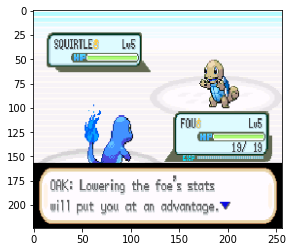

In [13]:
# This image won't display, gets overwritten by next one
plt.imshow(open_cv_images[1])
# Single Image
plt.imshow(open_cv_images[0])

# 5. OpenCV Color Caveat

OpenCV loads images in `B-G-R` order (Blue, Green, Red), as opposed to `R-G-B` which I'm prety sure most of the rest of the world uses (Except people really into color, who use HSV or HSL or whatever)

What this implies:
- We could swap the first and last channel to display it as RGB easily with matplotlib.
- When saving a file OpenCV assumes the image is in BGR.

We'll focus on the first implication for now and discuss the second when we use PIL / Pillow.

We use OpenCV's `cvtColor` ('Convert Color') in the following way: `recolored_image = cv2.cvtColor(original_image, cv2.TYPE_OF_CONVERSION)`.

Conversions you'll probably use the most: 
- `cv2.COLOR_BGR2RGB`: convert BGR to RGB (essentially the same as `cv2.COLOR_RGB2BGR`, swaps first and third channel)
- `cv2.COLOR_BGR2GRAY`: convert BGR to Grayscale (1-channel) (`RGB2GRAY` also available)
- `cv2.COLOR_GRAY2BGR`: convert Grayscale to BGR 3-channel (`GRAY2RGB` also available)

[Reference for changing colors (Bonus Object Tracking demo using HSV color space)](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html)

[All Conversion FLAGS](https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga4e0972be5de079fed4e3a10e24ef5ef0)

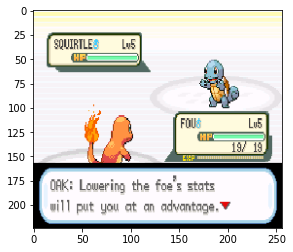

In [14]:
rgb_images = []
grayscale_images = []
for bgr_image in open_cv_images:
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    rgb_images.append(rgb_image)
    gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(gray_image)

plt.imshow(rgb_images[0])

# 6. Displaying multiple Images with Matplotlib

Now our RGB images can display nicely, so let's move on to displaying multiple images in a grid with matplotlib.

We'll use matplotlib `subplots()`, but you can find many implementations of 'make grid of images' with matplotlibt using  other functions

[Reference for matplotlib subplots (also see figures keywords link)](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html)

[HTML colornames that are valid for matplotlib](https://www.w3schools.com/colors/colors_names.asp)

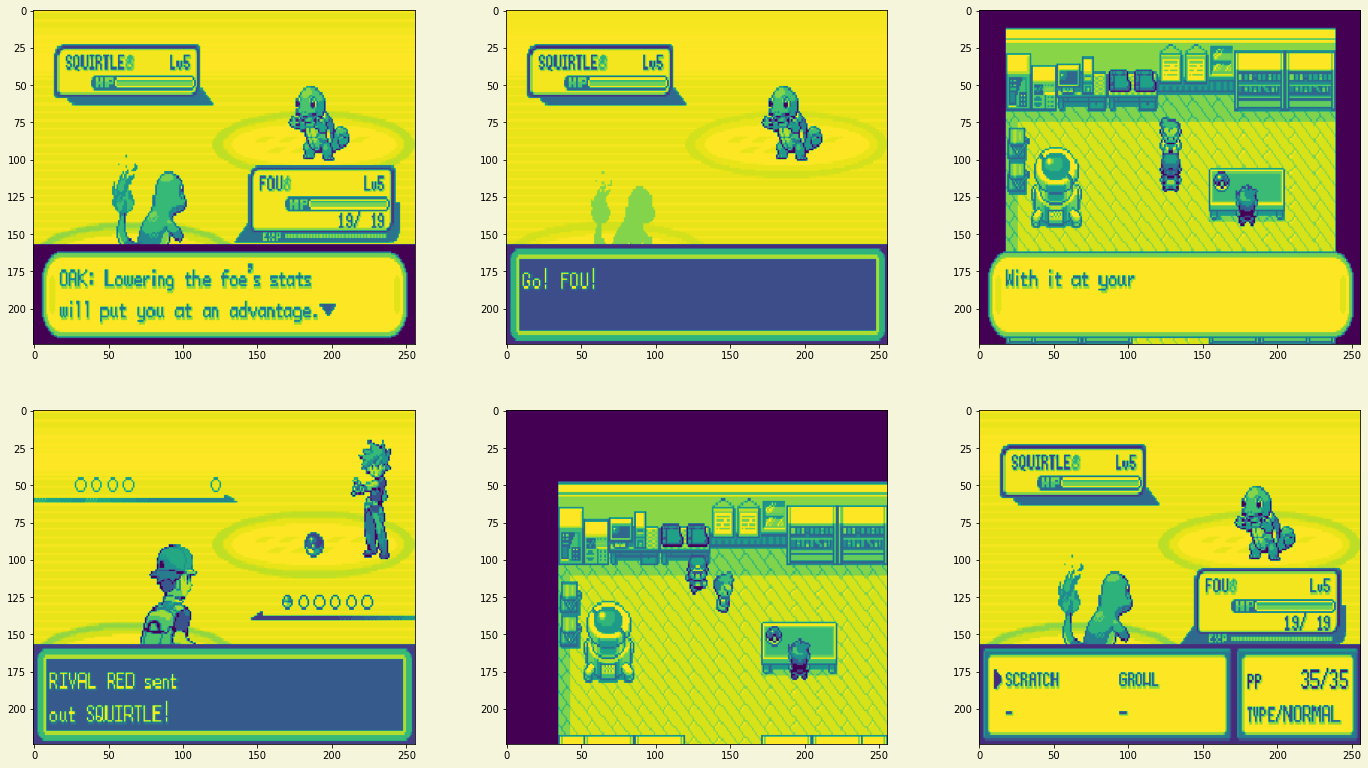

In [15]:
NUM_ROWS = 2
NUM_COLS = 3
# Scale and Dimensions to easier view things in your browser. 16:9 is common screen ratio
SCALE = 1.5
FIG_DIMENSIONS = (16 * SCALE, 9 * SCALE)
BG_COLOR = 'beige'

_, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=FIG_DIMENSIONS, facecolor=BG_COLOR)
# Turn 2d-array of axes into 1d list to select each (row, col) index
axes = axes.flatten()
for i, axis in enumerate(axes):
    axis.imshow(grayscale_images[i])
plt.show()

# 7. Matplotlib Grayscale Color Caveat

Well we've run into another display issue. Our grayscale images are 1 channel, but why does matplotlib show these colors? Grayscale / 1-channel images can be used in many domains, and matplotlib isn't just for plotting images, so their default `colormap` from values to colors is not `Grayscale`, but instead it's something called `viridis` and used to be `jet`. (I dont' know anything about the uses of these, but there's a whole talk on why they make `viridis`, so there's theory behind it).

We'll just make sure to specify to matplotlib that we want to use the `gray` colormap whenever we `imshow` an image. Or use another one of [matplotlib colormaps](https://matplotlib.org/3.2.1/gallery/color/colormap_reference.html).

We also will treat this as a whole new figure (a new set of subplots), so we'll use the `plt.subplots()` call again

[Reference for default map in matplotlib](https://matplotlib.org/3.2.1/users/dflt_style_changes.html#colormap)

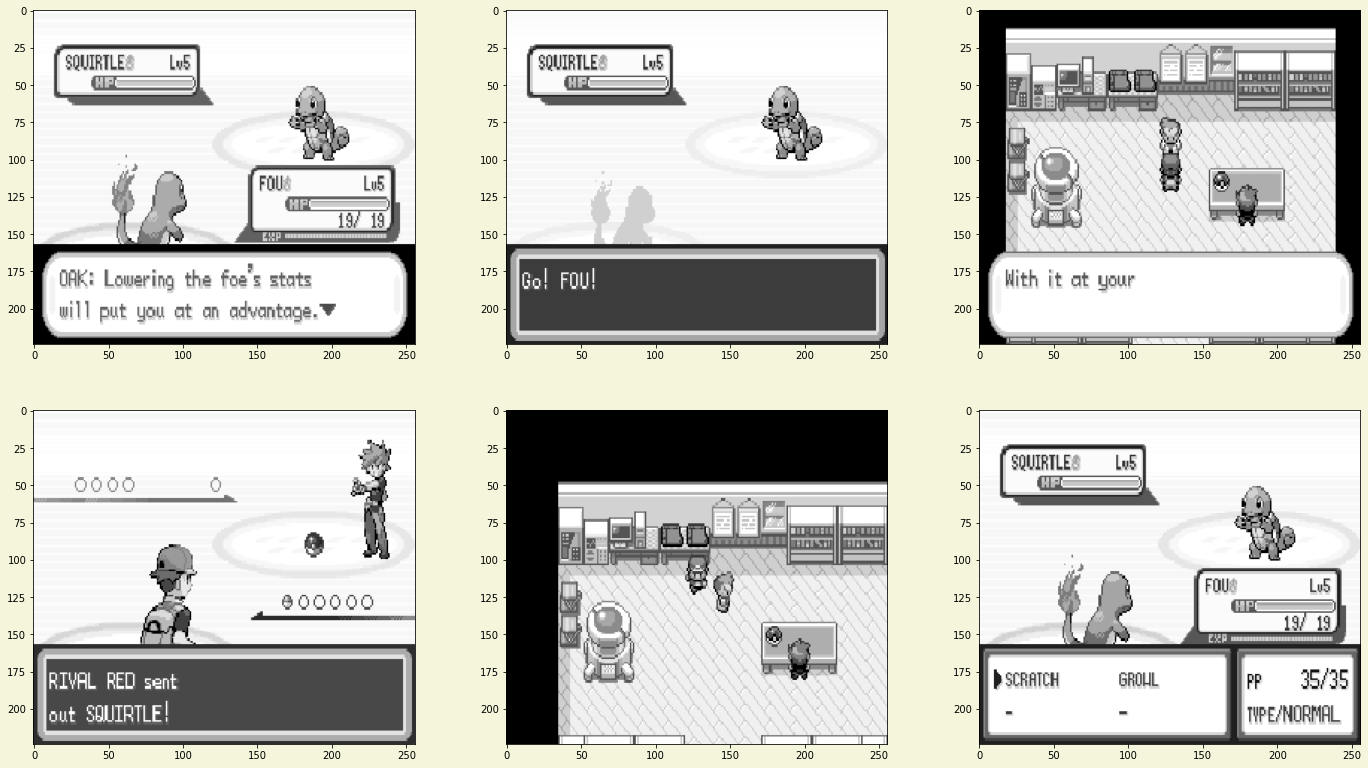

In [16]:
_, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=FIG_DIMENSIONS, facecolor=BG_COLOR)
# Turn 2d-array of axes into 1d list to select each (row, col) index
axes = axes.flatten()
for i, axis in enumerate(axes):
    axis.imshow(grayscale_images[i], cmap='gray')
plt.show()

# Bonuses!

Those are the most important points about using Python Glob to get files, OpenCV to load, MatplotLib to display.

We'll now go into more specific use cases
- Plotting image changes on multiple images in a grid
- Using PIL / Pillow and the differences with OpenCV
- Saving Images

# 8. Function for plotting image changes on multiple images in a grid

Commonly when we do image processing tasks we'll have an `input`, perform some operation (often using a `mask` or another `image`), and then have some `output` image that's different from the original. Maybe we want to perform multiple operations and view all of them, then we'd have an `extra_output` for each `input`

We usually want to compare the `output` with the `input` to make sure our operation is doing what we want, and we usually want to ensure it's working on multiple images.

What this implies:
- If we maintain a list of inputs and a list of outputs that correspond to each input we can display each `input` in one row, and each `output` on the next to compare 
- If `inputs` and `outputs` have a one-to-one relationship, it'll be simple to go through both in one list but display in multiple rows
- We can treat any transformation or step of our program as an operation, and might want to check that each one works as we're intending

We'll make a function that takes a list of ALL the image lists concatenated and the number of `inputs` (length of our `inputs` list) to display each list row by row.

## Note: The only error checking we do is for single channel image vs RGB(A), so the list best be divisible by the number of samples

(We'll also only use 3 images for size constraints)

Num inputs: 3, num rgb outputs: 3, num grayscale images: 3
Total: 9


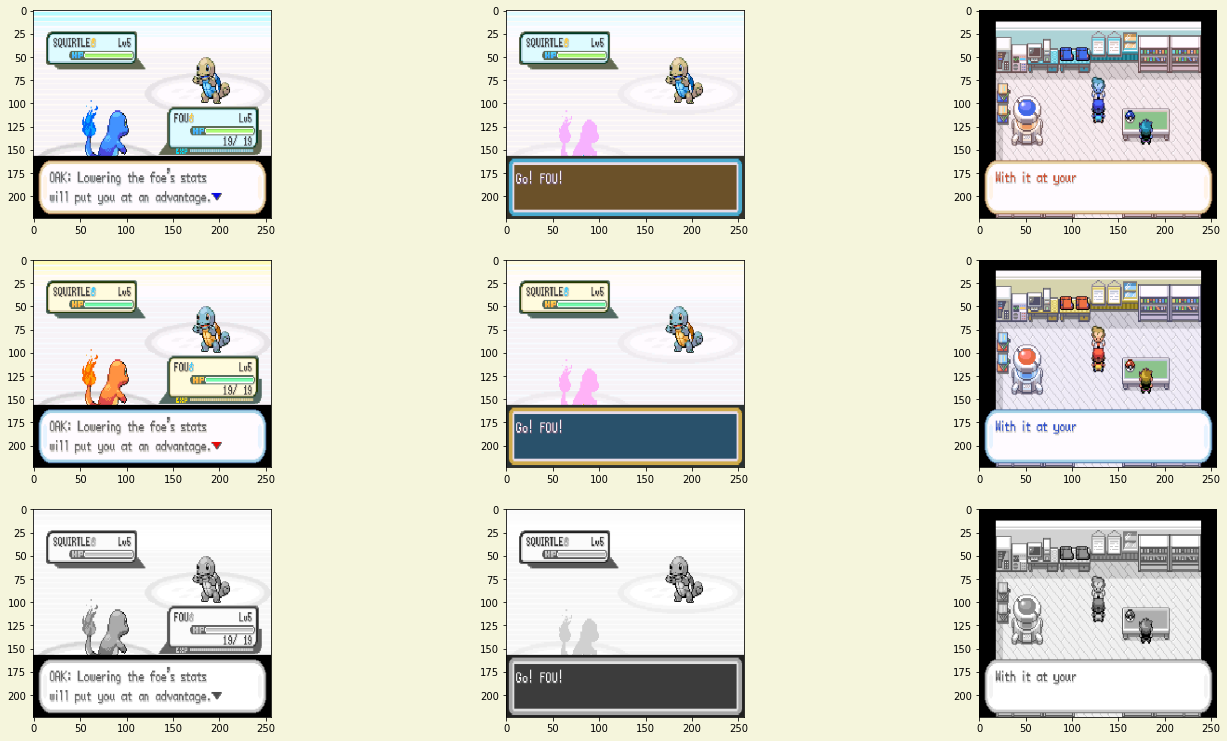

In [17]:
def display_image_comparison(list_of_inputs_and_outputs, number_of_samples, fig_dimensions=(24, 13), bg_color='beige'):
    num_rows = len(list_of_inputs_and_outputs) // number_of_samples 
    _, axes = plt.subplots(num_rows, number_of_samples, figsize=fig_dimensions, facecolor=bg_color)
    axes = axes.flatten()
    for i, axis in enumerate(axes):
        image_to_display = list_of_inputs_and_outputs[i]
        if len(image_to_display.shape) == 2:
            axis.imshow(image_to_display, cmap='gray')
        else:
            axis.imshow(image_to_display)
    plt.show()

# Imagine our task is comparing grayscale and rgb images, we've already done the transformations and maintained the images
# Load in input images
input_images = open_cv_images[:3]
# Do some operation to them, saving each in a list
recolor_operation_outputs = rgb_images[:3]
# Do some other operation to the intermediate step or inputs
gray_operation_outputs = grayscale_images[:3]

# We can concatenate a few ways, python lists are interesting
all_images = []
all_images.extend(input_images)
all_images.extend(recolor_operation_outputs)
all_images.extend(gray_operation_outputs)

# One-liner expand each list into elements
# all_images = [*input_images, *recolor_operation_outputs, *gray_operation_outputs]

print(f"Num inputs: {len(input_images)}, num rgb outputs: {len(recolor_operation_outputs)}, num grayscale images: {len(gray_operation_outputs)}")
print(f"Total: {len(all_images)}")
display_image_comparison(all_images, len(input_images))

# 9a. Using PIL / Pillow Image library

PIL / Pillow / Python Imaging Library is also super popular, but the images are in a different format than OpenCV and can't be displayed immediately by Matplotlib, so we'll go over some of the differences. I'll make notes in the code that show where to be careful when dealing with Pillow vs OpenCV.

Installing this library has changed over the years. Using `pip install Pillow` should get you the correct version. Alternatively, the pytorch extension `torchvision` has Pillow as a dependency, so if you `pip install torchvision` you should get a working Pillow.

I'll mostly only refer to the `Image` Module ([Documentation](https://pillow.readthedocs.io/en/stable/reference/Image.html)), ImageColor and ImageChops may also be relevant to your tasks.

We'll also need direct access to Numpy for conversions and displaying, we import as `np` for ease of typing

## NOTE Older guides on PIL import it differently. You probably want to use `from PIL import Image`
[Reference](https://pillow.readthedocs.io/en/stable/installation.html)

In [18]:
import PIL
from PIL import Image
import numpy as np
print(PIL.__version__)
print(np.__version__)

7.1.1
1.18.1


# 9b. Loading Images with PIL

Not much different from OpenCV, just a different command

First PIL image type: <class 'PIL.PngImagePlugin.PngImageFile'>, size: (256, 224), Image Mode: RGB
OpenCV image type: <class 'numpy.ndarray'>, size: (224, 256, 3)


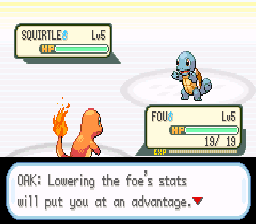

In [21]:
pil_images = []
for file_path in file_names:
    # Use open() instead of imread()
    loaded_image = Image.open(file_path)
    pil_images.append(loaded_image)

# Use .size instead of .shape, which yields (Width, Height), unlike numpy ndarray.shape, which is (Height, Width)
print(f"First PIL image type: {type(pil_images[0])}, size: {pil_images[0].size}, Image Mode: {pil_images[0].mode}")
print(f"OpenCV image type: {type(open_cv_images[0])}, size: {open_cv_images[0].shape}")

# In most cases we should be able to view PIL images just by calling the variable. I'm not sure what notebook setups this works in
pil_images[0]

# 9c. Display PIL images in matplotlib

One way to compare with OpenCV images is using matplotlib, but we need to convert. So we'll use the numpy conversion `asarray()` to get something matplotlib can use.

As you should see, PIL loads images in RGB format by default.

PIL size: (256, 224), numpy shape: (224, 256, 3)


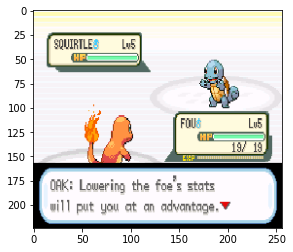

In [22]:
numpy_from_pil = np.asarray(pil_images[0])
print(f"PIL size: {pil_images[0].size}, numpy shape: {numpy_from_pil.shape}")
plt.imshow(numpy_from_pil)

# 9d. Convert PIL image colors

This is a good time to talk about `in-place` vs `out-of-place` operations. In-Place means something affects the object directly, and thus will have some effect on the object. Out of Place means the original object isn't altered during the operation and a brand new object is returned by the function. 

Most operations we're using here are Out of Place, so be sure to save the result in a new variable assignment (as in `gray_pil = pil_image.convert()`) or append the result to a list.

But be on the look out for In-Place operations, especially in Numpy. They use less memory because they don't save two copies of the thing you're working with, but they'll affect your original data, so side effect bugs may occur in your program.

For displaying, we'll convert to numpy pre-emptively

See [Pillow image modes](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes) for some more info

- "1" is 1-bit pixels, black or white
- "L" is 8-bit black and white (0...255 scale)
- "RGB" is 8-bit RGB

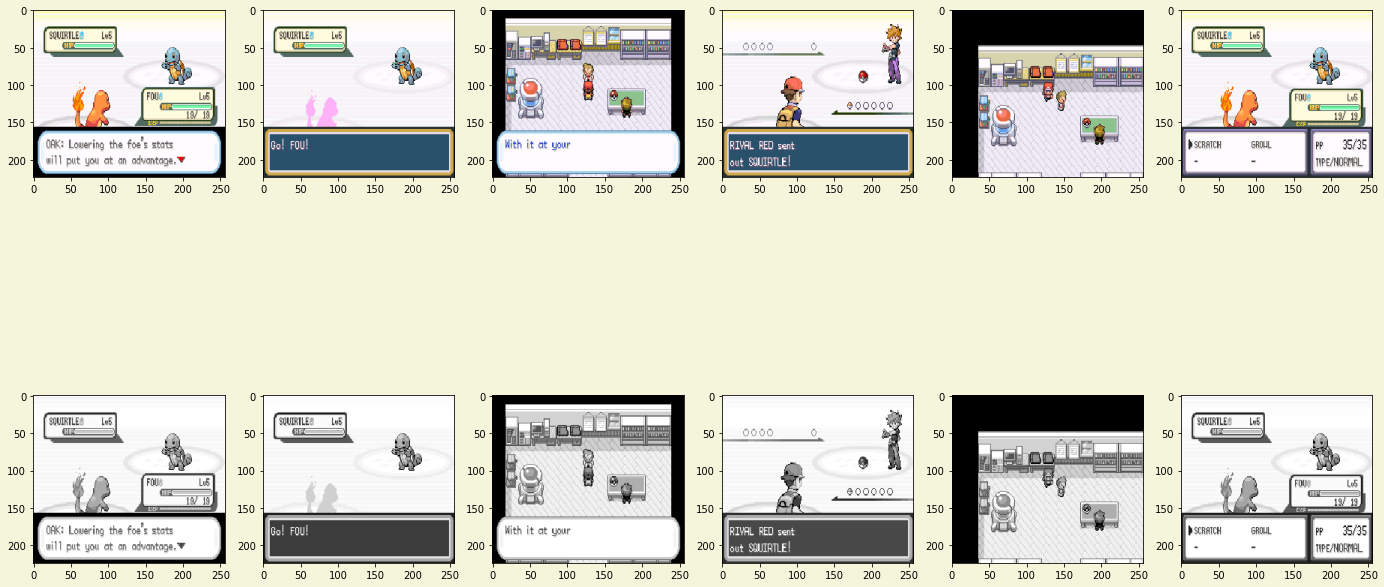

In [23]:
input_images = []
gray_images = []
for pil_image in pil_images:
    numpy_from_pil = np.asarray(pil_image)
    input_images.append(numpy_from_pil)
    
    gray_pil = pil_image.convert(mode="L")
    gray_numpy = np.asarray(gray_pil)
    gray_images.append(gray_numpy)

all_images = [*input_images, *gray_images]
display_image_comparison(all_images, len(input_images))

# 10a. Saving your images

After a long hard day of image processing and converting, you probably want to save the results so that your computer doesn't have to do all that hard work all over again.

**NOTE** The middle image that displays correctly is actually backwards to OpenCV

We'll use a directory that is at the same level as our `.ipynb` in our filesystem, so we can reach it with `./out_images` as opposed to a full absolute path (ex. `/home/username/projects/segmentation/outputs`)

In [29]:
import os
output_dir = './out_images'
os.makedirs(output_dir, exist_ok=True)

opencv image type: <class 'numpy.ndarray'>, shape: (224, 256, 3)
rgb converted opencv image type: <class 'numpy.ndarray'>, shape: (224, 256, 3)
pil image type: <class 'PIL.PngImagePlugin.PngImageFile'>, size: (256, 224)


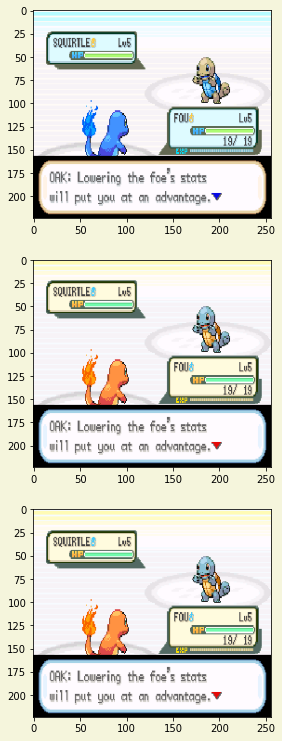

In [35]:
image_to_save = open_cv_images[0]
bgr_image_to_save = rgb_images[0]
pil_image_to_save = pil_images[0]
print(f"opencv image type: {type(image_to_save)}, shape: {image_to_save.shape}")
print(f"rgb converted opencv image type: {type(bgr_image_to_save)}, shape: {bgr_image_to_save.shape}")
print(f"pil image type: {type(pil_image_to_save)}, size: {pil_image_to_save.size}")
display_images = [image_to_save, bgr_image_to_save, np.asarray(pil_image_to_save)]
display_image_comparison(display_images, 1)

In [36]:
# Using `os.path.join` because it makes sure the `/` dividers are correct in file_paths

# cv2.imwrite(filename_string, img_ndarray)
cv2.imwrite(os.path.join(output_dir, "loaded_w_cv.png"), image_to_save)
cv2.imwrite(os.path.join(output_dir, "loaded_and_convert_w_cv.png"), bgr_image_to_save)

# PIL my_image_variable.save(filename_string)
pil_image_to_save.save(os.path.join(output_dir, "loaded_w_pil.png"))

# Validate our work
print(glob.glob(os.path.join(output_dir, "*.png")))

['./out_images/loaded_and_convert_w_cv.png', './out_images/loaded_w_pil.png', './out_images/loaded_w_cv.png']


# 10b. Saving Colors Correctly

Again, OpenCV uses BGR by default on save and load, PIL uses RGB. If you converted to RGB with OpenCV you should convert color back before you save.

So when we saved the OpenCV BGR Image `loaded_w_cv.png` it saved as a png that will be read as RGB (except by OpenCV).

When we saved the PIL RGB Image `loaded_w_pil.png` it also saved as a png that will be read as RGB (except by OpenCV)

To demonstrate, we'll load all 3 with PIL again, since that defaults to RGB loading

./out_images/loaded_and_convert_w_cv.png
./out_images/loaded_w_pil.png
./out_images/loaded_w_cv.png


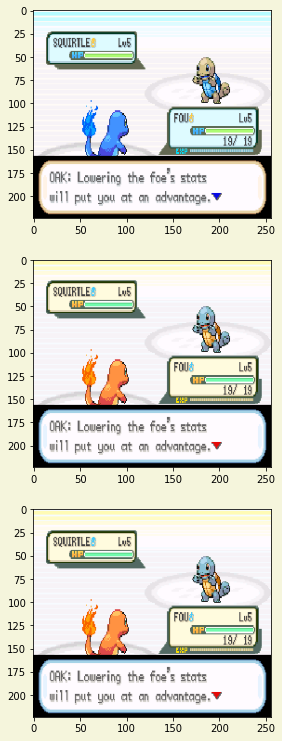

In [37]:
# Using an `f` formatted string is also fine, so long as you know whether the variables have `/`'s
saved_files = glob.glob(f"{output_dir}/*.png")

images_to_display = []
for file_path in saved_files:
    print(file_path)
    raw_pil = Image.open(file_path)
    np_img = np.asarray(raw_pil)
    images_to_display.append(np_img)

display_image_comparison(images_to_display, 1)

# 11. Wrap-up

Those are all the basic loading, converting, and saving operations that I've needed to use with OpenCV and PIL, working in an ipython notebook or in regular `.py` scripts

As a final code snippet, we'll go from OpenCV Image (numpy ndarray) to PIL Image, as we haven't actually needed to do that without saving first. You'd use this if you want to pass numpy loaded arrays into a PIL-based image processing pipeline (ex. torchvision transforms)

**NOTE** Again check your color conversions. `Image.fromarray()` expects an array in RGB form and will treat whatever 3-channel array you give it as such.

cv image: <class 'numpy.ndarray'>, shape (224, 256, 3)
converted to pil: <class 'PIL.Image.Image'>, size: (256, 224), mode: RGB
rgb_cv image converted to pil: <class 'PIL.Image.Image'>, size: (256, 224), mode: RGB


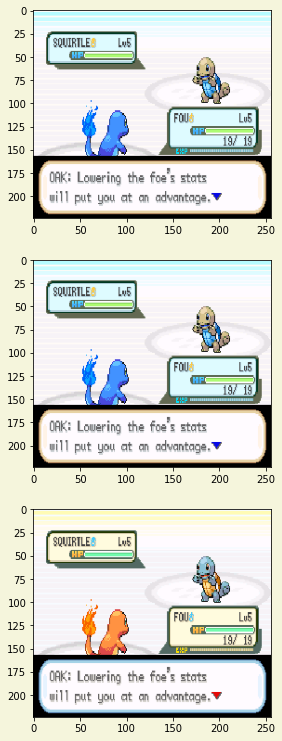

In [39]:
cv_image_to_convert = open_cv_images[0]
print(f"cv image: {type(cv_image_to_convert)}, shape {cv_image_to_convert.shape}")

new_pil_image = Image.fromarray(cv_image_to_convert)
pil_from_rgb_cv = Image.fromarray(rgb_images[0])
print(f"converted to pil: {type(new_pil_image)}, size: {new_pil_image.size}, mode: {new_pil_image.mode}")
print(f"rgb_cv image converted to pil: {type(pil_from_rgb_cv)}, size: {pil_from_rgb_cv.size}, mode: {pil_from_rgb_cv.mode}")
to_display = [cv_image_to_convert, np.asarray(new_pil_image), np.asarray(pil_from_rgb_cv)]
display_image_comparison(to_display, 1)